# Simulate Thompson Subsampling

Thompson sampling approach requires updating posteriors for each iteration, however, in each iteration we only know one new label and that may be supply much information for updating. So instead of updating all posteriors we uniformly random sample some entities and relations to update. 

We experiments on how subsampling affects the ROC_AUC_SCORE, cumulative gain as well as running time.

Evaluation metrics:

(1)ROC_AUC_SCORE: calculated between true labels and predictions for each iterations  
(2)Cumulative gain: for each iteration, if the maximum prediction corresponding with the valid labels gain 1, otherwise 0. Show cumulative gain for all iterations.
(3)running time: average running time for each iteration

We chose repeated labelling and Thompson Sampling for 5,000 iterations, and used [NATIONS](https://github.com/dongwookim-ml/kg-data) dataset as an example, there are totally 2,024 valid triples, 14 entities, 56 relations.

From the obvious experiments (notebook exper1 and exper2), we observed when the number of entities and relations are small, the performance is not good. One thought is if we increase the subsampling size when we get more labels, what will happen?

Then we design the comparison experiments:

Experiment1: subn_ent: 2, subn_rel: 2, not change subsampling size

Experiment2: when obsn_labels < 1,000: subn_ent: 2, subn_rel: 2
             otherwise: subn_ent: 10, subn_rel: 10  
             
              (during 5,000 iterations, TS totally get around 1,400 labels)
              
Experiment3: subn_ent: 10, subn_rel: 10, not change subsampling size


In [1]:
# direct to parent folder
import sys
sys.path.append("../acton")

from acton.database import GraphReader, GraphDatabase
from acton.predictors import TensorPredictor
from acton.recommenders import ThompsonSamplingRecommender
from acton.labellers import GraphDatabaseLabeller
import acton.acton
import tempfile
import astropy.io.ascii as io_ascii
import os.path
import numpy
import logging
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict

/home/admin-u6015325/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
logging.basicConfig(level = logging.DEBUG)

_path = 'kg-data/nation/triples.txt'
output_path = 'acton.proto'
outfile_path = "ts_subsampling_exper3/"
n_dim = 10
TS= 0.0
RANDOM = 1.0

In [3]:
with GraphReader(_path, n_dim) as reader:
    n_relations = reader.n_relations
    n_entities = reader.n_entities
    totoal_size = n_relations * n_entities * n_entities
    ids = numpy.arange(totoal_size)
    
    N_EPOCHS = 5000
    repeated_labelling = True

    results = defaultdict(list)
    
    subn_ent = [2]
    subn_rel = [2]
    inc_sub = True
    
    # rtrs: repeated train ROC-AUC-SCORE
    # rtes: repeated test ROC-AUC-SCORE
    # rg: repeated cumulative gain
    
    for i in range(len(subn_ent)):
        subn_entities = subn_ent[i]
        subn_relations = subn_rel[i]
    
        label = '_e' + str(subn_entities) + '_r' + str(subn_relations)
        logging.debug(label)
        
        results['TS_rtrs' + label], results['TS_rtes' + label],\
        results['TS_rg' + label], results['time' + label] =  \
            acton.acton.simulate_active_learning(
                ids, reader, {}, output_path,
                n_epochs=N_EPOCHS,
                recommender='ThompsonSamplingRecommender',
                predictor='TensorPredictor',
                labeller='GraphDatabaseLabeller',
                diversity=TS,
                repeated_labelling=repeated_labelling,
                inc_sub = inc_sub,
                subn_entities = int(subn_entities),
                subn_relations = int(subn_relations)
        )
    
    with open(outfile_path + 'outfile_inc', 'wb') as fp:
        pickle.dump(results,fp)  

DEBUG:root:New feature E array size: (5, 14, 10)
DEBUG:root:New feature R array size: (5, 56, 10, 10)
DEBUG:root:New label array size: (56, 14, 14)
DEBUG:root:_e2_r2
DEBUG:root:Found 10976 instances.
DEBUG:root:Splitting into training/testing sets.
DEBUG:root:Drawing initial labels.
DEBUG:root:Recommending: [(42, 11, 0), (22, 1, 10), (42, 3, 9), (46, 0, 3), (48, 8, 5), (43, 8, 7), (48, 0, 10), (11, 4, 0), (47, 9, 4), (28, 12, 5)]
DEBUG:root:Writing protobufs to acton.proto.
INFO:root:Epoch 1/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.018 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 8770).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(53, 1, 1)]
INFO:root:Epoch 2/5000
DEBUG:root:Labelling recommen

INFO:root:Epoch 18/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.013 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8758).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 11, 13)]
INFO:root:Epoch 19/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.012 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8758).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 12, 12)]
INFO:root:Epoch 20/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
D

INFO:root:Epoch 36/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.022 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8746).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 10, 10)]
INFO:root:Epoch 37/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8746).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 1, 10)]
INFO:root:Epoch 38/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:

DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 8743).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 13, 6)]
INFO:root:Epoch 55/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.017 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 8742).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 13, 12)]
INFO:root:Epoch 56/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8741).
DEBUG:r

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 11, 9)]
INFO:root:Epoch 73/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.013 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8734).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 11, 6)]
INFO:root:Epoch 74/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.015 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0016 s.)
DEBUG:root:Making predictions (unlabelled, n = 8733).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 11, 6)]
INFO:root:Epoch 75/5

INFO:root:Epoch 91/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00036 s.)
DEBUG:root:Making predictions (unlabelled, n = 8720).
DEBUG:root:(Took 0.00051 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 9, 7)]
INFO:root:Epoch 92/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.019 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8720).
DEBUG:root:(Took 0.00093 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 9, 7)]
INFO:root:Epoch 93/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBU

DEBUG:root:(Took 0.035 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making predictions (unlabelled, n = 8713).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 7, 8)]
INFO:root:Epoch 110/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.043 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8712).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 3, 3)]
INFO:root:Epoch 111/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (ref

DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 8703).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 3, 2)]
INFO:root:Epoch 128/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8702).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 7, 7)]
INFO:root:Epoch 129/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.02 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8702).
DEBUG:roo

INFO:root:Epoch 146/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8696).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 8, 12)]
INFO:root:Epoch 147/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8696).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 8, 12)]
INFO:root:Epoch 148/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label ID

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8687).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 12, 11)]
INFO:root:Epoch 165/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00048 s.)
DEBUG:root:Making predictions (unlabelled, n = 8686).
DEBUG:root:(Took 0.00047 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 3, 12)]
INFO:root:Epoch 166/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 ent

DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8679).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 0, 9)]
INFO:root:Epoch 183/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.025 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8679).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 4, 3)]
INFO:root:Epoch 184/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Ma

DEBUG:root:Making predictions (unlabelled, n = 8673).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 8, 8)]
INFO:root:Epoch 201/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8673).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 8, 8)]
INFO:root:Epoch 202/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.025 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 8673).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:r

DEBUG:root:Making predictions (unlabelled, n = 8661).
DEBUG:root:(Took 0.00092 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 11, 7)]
INFO:root:Epoch 219/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00033 s.)
DEBUG:root:Making predictions (unlabelled, n = 8660).
DEBUG:root:(Took 0.00039 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 12, 12)]
INFO:root:Epoch 220/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8659).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making recommendations.
DEBU

DEBUG:root:Recommending: [(3, 3, 12)]
INFO:root:Epoch 237/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 8648).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 12, 5)]
INFO:root:Epoch 238/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8647).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 0, 12)]
INFO:root:Epoch 2

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 8640).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 7, 2)]
INFO:root:Epoch 256/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8639).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 13, 13)]
INFO:root:Epoch 257/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:Subsampling 2 entities

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.025 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8624).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 3, 3)]
INFO:root:Epoch 274/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8624).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 12, 5)]
INFO:root:Epoch 275/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 enti

DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making predictions (unlabelled, n = 8615).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 4, 11)]
INFO:root:Epoch 292/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making predictions (unlabelled, n = 8615).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 10, 2)]
INFO:root:Epoch 293/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:ro

DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8606).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 12, 13)]
INFO:root:Epoch 310/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.033 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8606).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 12, 13)]
INFO:root:Epoch 311/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Ma

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8596).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 8, 6)]
INFO:root:Epoch 328/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8595).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 0, 8)]
INFO:root:Epoch 329/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:ro

DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8583).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 13, 13)]
INFO:root:Epoch 346/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00028 s.)
DEBUG:root:Making predictions (unlabelled, n = 8582).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 0, 6)]
INFO:root:Epoch 347/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.037 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predict

DEBUG:root:Making predictions (unlabelled, n = 8575).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 5, 2)]
INFO:root:Epoch 364/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making predictions (unlabelled, n = 8574).
DEBUG:root:(Took 0.00052 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 10, 0)]
INFO:root:Epoch 365/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00031 s.)
DEBUG:root:Making predictions (unlabelled, n = 8573).
DEBUG:root:(Took 0.0016 s.)
DEBUG:r

DEBUG:root:Recommending: [(40, 12, 10)]
INFO:root:Epoch 382/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.033 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8568).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 7, 7)]
INFO:root:Epoch 383/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8568).
DEBUG:root:(Took 0.00092 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 7, 13)]
INFO:root:Epoch 384/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting l

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.035 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 8556).
DEBUG:root:(Took 0.0013 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 2)]
INFO:root:Epoch 401/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.034 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making predictions (unlabelled, n = 8555).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 10, 13)]
INFO:root:Epoch 402/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

INFO:root:Epoch 418/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8545).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 7)]
INFO:root:Epoch 419/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 8544).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 9, 7)]
INFO:root:Epoch 420/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label ID

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 2, 4)]
INFO:root:Epoch 436/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8533).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 12, 2)]
INFO:root:Epoch 437/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00029 s.)
DEBUG:root:Making predictions (unlabelled, n = 8532).
DEBUG:root:(Took 0.0003 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 9, 9)]
INFO:root:Epoch 43

DEBUG:root:Recommending: [(8, 7, 12)]
INFO:root:Epoch 454/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.033 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8524).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 7, 12)]
INFO:root:Epoch 455/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0013 s.)
DEBUG:root:Making predictions (unlabelled, n = 8524).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 12, 13)]
INFO:root:Epoch 456/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting lab

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8513).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 2, 11)]
INFO:root:Epoch 473/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8513).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 13)]
INFO:root:Epoch 474/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:

DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8504).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 6, 0)]
INFO:root:Epoch 491/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.025 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8503).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 0)]
INFO:root:Epoch 492/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root

DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8496).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 7, 4)]
INFO:root:Epoch 509/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making predictions (unlabelled, n = 8495).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 4, 12)]
INFO:root:Epoch 510/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8495).
DEBUG:ro

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 7, 7)]
INFO:root:Epoch 527/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.039 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 8487).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 7, 7)]
INFO:root:Epoch 528/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 8487).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 5, 10)]
INFO:root:Epoch 529/5000
DEBUG:root:Labelling recom

DEBUG:root:Making predictions (unlabelled, n = 8475).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 7, 1)]
INFO:root:Epoch 545/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8474).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 7, 4)]
INFO:root:Epoch 546/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8473).
DEB

DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 3, 12)]
INFO:root:Epoch 563/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making predictions (unlabelled, n = 8464).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 7, 7)]
INFO:root:Epoch 564/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making predictions (unlabelled, n = 8463).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8459).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 11, 12)]
INFO:root:Epoch 582/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8458).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 4, 0)]
INFO:root:Epoch 583/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0

DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8450).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 3, 12)]
INFO:root:Epoch 600/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 8449).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 12, 12)]
INFO:root:Epoch 601/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBU

DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8441).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 12, 7)]
INFO:root:Epoch 618/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.035 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 8440).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 12, 12)]
INFO:root:Epoch 619/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBU

DEBUG:root:Recommending: [(43, 9, 13)]
INFO:root:Epoch 635/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0002 s.)
DEBUG:root:Making predictions (unlabelled, n = 8427).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 10, 7)]
INFO:root:Epoch 636/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00093 s.)
DEBUG:root:Making predictions (unlabelled, n = 8426).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 12)]
INFO:root:Epoch 63

INFO:root:Epoch 653/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8420).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 0, 11)]
INFO:root:Epoch 654/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8420).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 0, 11)]
INFO:root:Epoch 655/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.


DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8415).
DEBUG:root:(Took 0.0012 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 12)]
INFO:root:Epoch 672/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8415).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 12)]
INFO:root:Epoch 673/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making

DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00051 s.)
DEBUG:root:Making predictions (unlabelled, n = 8408).
DEBUG:root:(Took 0.0012 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 11, 13)]
INFO:root:Epoch 690/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8408).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 4, 12)]
INFO:root:Epoch 691/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Makin

DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8398).
DEBUG:root:(Took 0.00092 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 4)]
INFO:root:Epoch 708/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 8397).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 9, 8)]
INFO:root:Epoch 709/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:

DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8388).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 4, 4)]
INFO:root:Epoch 726/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8388).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 11, 0)]
INFO:root:Epoch 727/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.033 s.)
DEBUG:root:Making prediction

DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8383).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 2)]
INFO:root:Epoch 744/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 8382).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 13, 0)]
INFO:root:Epoch 745/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 

DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8371).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 4, 7)]
INFO:root:Epoch 762/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8370).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 13, 2)]
INFO:root:Epoch 763/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:

DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8358).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 7, 1)]
INFO:root:Epoch 780/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8357).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 4, 13)]
INFO:root:Epoch 781/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.034 s.)
DEBUG:root:Making predictions

DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 8350).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 4)]
INFO:root:Epoch 798/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8350).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 7, 13)]
INFO:root:Epoch 799/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8349).
DEBUG:r

DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8337).
DEBUG:root:(Took 0.00056 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 2, 13)]
INFO:root:Epoch 816/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8336).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 5)]
INFO:root:Epoch 817/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predict

DEBUG:root:Making predictions (unlabelled, n = 8327).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 7, 5)]
INFO:root:Epoch 834/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8326).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 7, 5)]
INFO:root:Epoch 835/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8326).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:

DEBUG:root:Recommending: [(43, 9, 7)]
INFO:root:Epoch 852/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8322).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 9, 7)]
INFO:root:Epoch 853/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8322).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 5)]
INFO:root:Epoch 854/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting labe

DEBUG:root:Recommending: [(38, 7, 0)]
INFO:root:Epoch 870/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8313).
DEBUG:root:(Took 0.00056 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 7, 13)]
INFO:root:Epoch 871/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8313).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 0, 0)]
INFO:root:Epoch 87

DEBUG:root:Recommending: [(3, 7, 7)]
INFO:root:Epoch 888/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 8303).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 7, 7)]
INFO:root:Epoch 889/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8303).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 7, 13)]
INFO:root:Epoch 890/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label I

DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8299).
DEBUG:root:(Took 0.00043 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 3, 13)]
INFO:root:Epoch 907/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 8299).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 5, 11)]
INFO:root:Epoch 908/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 219

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 12, 13)]
INFO:root:Epoch 925/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8293).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 8, 7)]
INFO:root:Epoch 926/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8292).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 2, 2)]
INFO:root:Epoch 92

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making predictions (unlabelled, n = 8287).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 2, 2)]
INFO:root:Epoch 944/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8287).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 2, 2)]
INFO:root:Epoch 945/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entitie

DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8282).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 5)]
INFO:root:Epoch 962/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8282).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 12, 12)]
INFO:root:Epoch 963/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:roo

DEBUG:root:Making predictions (unlabelled, n = 8274).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 9, 10)]
INFO:root:Epoch 980/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8273).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 12, 12)]
INFO:root:Epoch 981/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0012 s.)
DEBUG:root:Making predictions (unlabelled, n = 8272).
D

DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 8268).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 9, 4)]
INFO:root:Epoch 998/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8268).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 11, 12)]
INFO:root:Epoch 999/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8267).
DEBUG

DEBUG:root:Making predictions (unlabelled, n = 8265).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 11, 13)]
INFO:root:Epoch 1016/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.034 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 8264).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 9, 0)]
INFO:root:Epoch 1017/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 8263).

DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8261).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 3, 3)]
INFO:root:Epoch 1034/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 8260).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 3, 3)]
INFO:root:Epoch 1035/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8260).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root

DEBUG:root:Making predictions (unlabelled, n = 8254).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 11, 2)]
INFO:root:Epoch 1052/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8253).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 2, 9)]
INFO:root:Epoch 1053/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 8253).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEB

DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 7, 12)]
INFO:root:Epoch 1070/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8246).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 1)]
INFO:root:Epoch 1071/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8245).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recomme

DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 8233).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 5, 5)]
INFO:root:Epoch 1088/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making predictions (unlabelled, n = 8233).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 2)]
INFO:root:Epoch 1089/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictio

DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00026 s.)
DEBUG:root:Making predictions (unlabelled, n = 8225).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 0, 13)]
INFO:root:Epoch 1106/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 8224).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 13, 2)]
INFO:root:Epoch 1107/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:roo

DEBUG:root:(Took 0.035 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8213).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 0, 12)]
INFO:root:Epoch 1124/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8213).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 0, 12)]
INFO:root:Epoch 1125/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Ma

DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8209).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 0)]
INFO:root:Epoch 1142/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8209).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 0)]
INFO:root:Epoch 1143/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DE

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8202).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 10, 7)]
INFO:root:Epoch 1160/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.034 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00092 s.)
DEBUG:root:Making predictions (unlabelled, n = 8202).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 13)]
INFO:root:Epoch 1161/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sor

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 9)]
INFO:root:Epoch 1177/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 8192).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 9)]
INFO:root:Epoch 1178/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8192).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 13, 2)]
INFO:root:Epoch 1179/5000
DEBUG:root:Labelling 

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8188).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 2, 4)]
INFO:root:Epoch 1196/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8187).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 5, 0)]
INFO:root:Epoch 1197/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

INFO:root:Epoch 1213/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8182).
DEBUG:root:(Took 0.00032 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 13, 2)]
INFO:root:Epoch 1214/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8182).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 13, 4)]
INFO:root:Epoch 1215/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label I

DEBUG:root:Recommending: [(41, 7, 13)]
INFO:root:Epoch 1231/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 8175).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 0, 4)]
INFO:root:Epoch 1232/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.025 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8174).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 12, 0)]
INFO:root:Epoch 1233/5000
DEBUG:root:Labelling rec

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making predictions (unlabelled, n = 8167).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 5, 0)]
INFO:root:Epoch 1250/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making predictions (unlabelled, n = 8166).
DEBUG:root:(Took 0.00031 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 0, 13)]
INFO:root:Epoch 1251/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting p

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8161).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 4, 13)]
INFO:root:Epoch 1268/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8160).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 13)]
INFO:root:Epoch 1269/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8151).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 4, 13)]
INFO:root:Epoch 1286/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 8151).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 4, 13)]
INFO:root:Epoch 1287/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8148).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 12)]
INFO:root:Epoch 1304/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0012 s.)
DEBUG:root:Making predictions (unlabelled, n = 8148).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 11, 5)]
INFO:root:Epoch 1305/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 ent

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8144).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 13, 10)]
INFO:root:Epoch 1322/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8144).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 4, 12)]
INFO:root:Epoch 1323/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabel

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8136).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 0, 4)]
INFO:root:Epoch 1340/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8136).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 12)]
INFO:root:Epoch 1341/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 8131).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 11, 12)]
INFO:root:Epoch 1358/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 8130).
DEBUG:root:(Took 0.0013 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 7, 5)]
INFO:root:Epoch 1359/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 3 0 1 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.04 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8121).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 12)]
INFO:root:Epoch 1376/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.034 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8120).
DEBUG:root:(Took 0.00021 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 4)]
INFO:root:Epoch 1377/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sort

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8115).
DEBUG:root:(Took 0.00052 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 4, 5)]
INFO:root:Epoch 1394/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 3 1 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00029 s.)
DEBUG:root:Making predictions (unlabelled, n = 8114).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 0)]
INFO:root:Epoch 1395/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorti

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 3, 9)]
INFO:root:Epoch 1411/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.034 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8107).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 2, 2)]
INFO:root:Epoch 1412/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.033 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8106).
DEBUG:root:(Took 0.00033 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommen

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 12)]
INFO:root:Epoch 1429/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 8100).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 12)]
INFO:root:Epoch 1430/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8100).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 2, 12)]
INFO:root:

DEBUG:root:Making predictions (unlabelled, n = 8093).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 3, 12)]
INFO:root:Epoch 1447/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8092).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 4)]
INFO:root:Epoch 1448/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8092).
DEBUG:root:(Took 0.00083 s.)
DEBUG:

DEBUG:root:Recommending: [(7, 2, 13)]
INFO:root:Epoch 1465/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8089).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 10, 0)]
INFO:root:Epoch 1466/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 8089).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 9, 5)]
INFO:root:Epoch 1467/5000
DEBUG:root:Labelling recom

DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8087).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 0)]
INFO:root:Epoch 1484/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8087).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 4)]
INFO:root:Epoch 1485/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root

DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8085).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 7, 13)]
INFO:root:Epoch 1502/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.037 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8085).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 4, 12)]
INFO:root:Epoch 1503/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 0 3]
DEBUG:root:Subsampling 2 entities and 2 relations
DE

DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8080).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 9, 12)]
INFO:root:Epoch 1520/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8080).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 11, 12)]
INFO:root:Epoch 1521/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DE

DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 8075).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 5, 12)]
INFO:root:Epoch 1538/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8075).
DEBUG:root:(Took 0.00092 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 5, 12)]
INFO:root:Epoch 1539/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:M

DEBUG:root:Making predictions (unlabelled, n = 8070).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 5, 12)]
INFO:root:Epoch 1556/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8070).
DEBUG:root:(Took 0.0012 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 11, 4)]
INFO:root:Epoch 1557/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making predictions (unlabelled, n = 8070).
DEBUG:root:(Took 0.00084 s.)
DEBUG

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 0, 13)]
INFO:root:Epoch 1574/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8064).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 5, 13)]
INFO:root:Epoch 1575/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 8063).
DEBUG:root:(Took 0.0029 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 3, 0)]
INFO:root:Epoch 1

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 5)]
INFO:root:Epoch 1592/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8055).
DEBUG:root:(Took 0.0013 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 11, 13)]
INFO:root:Epoch 1593/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making predictions (unlabelled, n = 8054).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 0, 11)]
INFO:root:Epoch 1594/5000
DEBUG:root:Labelling r

INFO:root:Epoch 1610/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8048).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 11, 13)]
INFO:root:Epoch 1611/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making predictions (unlabelled, n = 8048).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 13)]
INFO:root:Epoch 1612/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label 

DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8043).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 4, 13)]
INFO:root:Epoch 1629/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8043).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 6, 11)]
INFO:root:Epoch 1630/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:roo

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8039).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 11, 0)]
INFO:root:Epoch 1647/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8038).
DEBUG:root:(Took 0.0012 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 0, 13)]
INFO:root:Epoch 1648/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predic

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 8035).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 13, 11)]
INFO:root:Epoch 1665/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8035).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 13, 11)]
INFO:root:Epoch 1666/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.033 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 8030).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 3, 12)]
INFO:root:Epoch 1683/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.033 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00036 s.)
DEBUG:root:Making predictions (unlabelled, n = 8030).
DEBUG:root:(Took 0.0021 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 3, 12)]
INFO:root:Epoch 1684/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 en

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8023).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 13, 11)]
INFO:root:Epoch 1701/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 8023).
DEBUG:root:(Took 0.00029 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 13, 11)]
INFO:root:Epoch 1702/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting 

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8020).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 13)]
INFO:root:Epoch 1719/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8020).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 5, 12)]
INFO:root:Epoch 1720/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 e

DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8014).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 9, 3)]
INFO:root:Epoch 1737/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.033 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0004 s.)
DEBUG:root:Making predictions (unlabelled, n = 8014).
DEBUG:root:(Took 0.0012 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 3, 12)]
INFO:root:Epoch 1738/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:ro

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8009).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 5, 13)]
INFO:root:Epoch 1755/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8008).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 5, 13)]
INFO:root:Epoch 1756/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:r

DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making predictions (unlabelled, n = 8004).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 9, 5)]
INFO:root:Epoch 1773/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8003).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 6, 6)]
INFO:root:Epoch 1774/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:r

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8002).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 5, 11)]
INFO:root:Epoch 1791/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8001).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 12, 7)]
INFO:root:Epoch 1792/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
D

DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7996).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 11, 12)]
INFO:root:Epoch 1809/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7995).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 12)]
INFO:root:Epoch 1810/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DE

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0014 s.)
DEBUG:root:Making predictions (unlabelled, n = 7994).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 11)]
INFO:root:Epoch 1827/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7994).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 11)]
INFO:root:Epoch 1828/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root

DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7991).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 13, 13)]
INFO:root:Epoch 1845/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7991).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 11, 13)]
INFO:root:Epoch 1846/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG

DEBUG:root:Making predictions (unlabelled, n = 7987).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 12)]
INFO:root:Epoch 1863/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7987).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 2, 5)]
INFO:root:Epoch 1864/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7986).


DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7982).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 7)]
INFO:root:Epoch 1881/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7981).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 11, 12)]
INFO:root:Epoch 1882/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.032 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0013 s.)
DEBUG:root:Making predic

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7976).
DEBUG:root:(Took 0.0012 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 5)]
INFO:root:Epoch 1899/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 7976).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 12, 4)]
INFO:root:Epoch 1900/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 2 ent

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7975).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 2, 5)]
INFO:root:Epoch 1917/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7975).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 7, 13)]
INFO:root:Epoch 1918/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting p

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.026 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7969).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 12, 11)]
INFO:root:Epoch 1935/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.027 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7969).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 12, 11)]
INFO:root:Epoch 1936/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 2

DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making predictions (unlabelled, n = 7967).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 12, 11)]
INFO:root:Epoch 1953/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.028 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7967).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 12, 11)]
INFO:root:Epoch 1954/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
D

DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.031 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7961).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 11, 12)]
INFO:root:Epoch 1971/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.03 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7961).
DEBUG:root:(Took 0.00092 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 5, 12)]
INFO:root:Epoch 1972/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 2 entities and 2 relations
DEBUG:root:(Took 0.029 s.)
DEBUG:root:Ma

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 3, 13)]
INFO:root:Epoch 1988/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7952).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 7, 9)]
INFO:root:Epoch 1989/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7952).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 11)]
INFO:root:E

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making predictions (unlabelled, n = 7947).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 4, 6)]
INFO:root:Epoch 2006/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7946).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 5)]
INFO:root:Epoch 2007/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00093 s.)
DEBUG:r

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7940).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 4, 13)]
INFO:root:Epoch 2024/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 2 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7940).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 11, 13)]
INFO:root:Epoch 2025/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting 

DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 2, 13)]
INFO:root:Epoch 2041/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7932).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 9, 11)]
INFO:root:Epoch 2042/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7932).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making reco

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7925).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 9, 13)]
INFO:root:Epoch 2059/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7924).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 5, 12)]
INFO:root:Epoch 2060/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 5)]
INFO:root:Epoch 2076/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7921).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 13)]
INFO:root:Epoch 2077/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7921).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 4, 13)]
INFO:root:

DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7914).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 5, 13)]
INFO:root:Epoch 2094/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 7914).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 11, 0)]
INFO:root:Epoch 2095/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:ro

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.14 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making predictions (unlabelled, n = 7904).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 13, 10)]
INFO:root:Epoch 2112/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7903).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 11, 12)]
INFO:root:Epoch 2113/5000
DEBUG:root:Labelling recommendations.
DEBUG:root

DEBUG:root:Making predictions (unlabelled, n = 7895).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 3, 0)]
INFO:root:Epoch 2129/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 7894).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 12, 11)]
INFO:root:Epoch 2130/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7894).
DEBUG:root:(Took 0.0006 s.)
DEBU

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 1 3]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7888).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 5, 12)]
INFO:root:Epoch 2147/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7888).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 3, 9)]
INFO:root:Epoch 2148/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7879).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 3, 0)]
INFO:root:Epoch 2164/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7878).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 11, 12)]
INFO:root:Epoch 2165/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0016 s.)
DEBUG:root:Making pred

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7874).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 12)]
INFO:root:Epoch 2182/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7874).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 3, 9)]
INFO:root:Epoch 2183/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:ro

DEBUG:root:Recommending: [(26, 13, 2)]
INFO:root:Epoch 2199/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7869).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 4, 13)]
INFO:root:Epoch 2200/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7869).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 7)]
INFO:root:Epoch 

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7865).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 4, 13)]
INFO:root:Epoch 2217/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 1 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 7865).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 10, 12)]
INFO:root:Epoch 2218/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making pre

INFO:root:Epoch 2234/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 7860).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 11, 13)]
INFO:root:Epoch 2235/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00054 s.)
DEBUG:root:Making predictions (unlabelled, n = 7860).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 13, 3)]
INFO:root:Epoch 2236/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting 

DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7852).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 9, 9)]
INFO:root:Epoch 2252/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7851).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 5, 13)]
INFO:root:Epoch 2253/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 3 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making prediction

DEBUG:root:Recommending: [(41, 11, 0)]
INFO:root:Epoch 2269/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7846).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 11, 7)]
INFO:root:Epoch 2270/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7845).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 11, 5)]
INFO:root:Epo

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7839).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 5, 13)]
INFO:root:Epoch 2287/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7839).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 13, 1)]
INFO:root:Epoch 2288/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 11, 13)]
INFO:root:Epoch 2304/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7832).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 1, 12)]
INFO:root:Epoch 2305/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7831).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Reco

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7824).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 13)]
INFO:root:Epoch 2322/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7823).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 12, 0)]
INFO:root:Epoch 2323/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 12)]
INFO:root:Epoch 2339/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7820).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 12, 5)]
INFO:root:Epoch 2340/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7820).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Rec

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7813).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 9, 0)]
INFO:root:Epoch 2357/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7812).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 4, 4)]
INFO:root:Epoch 2358/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] 

DEBUG:root:Making predictions (unlabelled, n = 7804).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 3, 13)]
INFO:root:Epoch 2374/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7803).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 9, 11)]
INFO:root:Epoch 2375/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7803).
DEBUG:root:(Took 0.00081 s.)
DEB

DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7797).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 0, 12)]
INFO:root:Epoch 2392/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7797).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 9, 5)]
INFO:root:Epoch 2393/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:Subsamp

DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 4, 6)]
INFO:root:Epoch 2409/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7792).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 11, 5)]
INFO:root:Epoch 2410/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7792).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making reco

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7786).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 9, 10)]
INFO:root:Epoch 2427/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making predictions (unlabelled, n = 7786).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 0, 13)]
INFO:root:Epoch 2428/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 

DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 2, 13)]
INFO:root:Epoch 2444/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7779).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 4, 10)]
INFO:root:Epoch 2445/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 1 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7778).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making reco

DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7772).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 0)]
INFO:root:Epoch 2462/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7771).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 5)]
INFO:root:Epoch 2463/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictio

INFO:root:Epoch 2479/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7764).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 5)]
INFO:root:Epoch 2480/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7764).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 9, 13)]
INFO:root:Epoch 2481/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting l

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making predictions (unlabelled, n = 7759).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 0, 13)]
INFO:root:Epoch 2497/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7759).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 9, 10)]
INFO:root:Epoch 2498/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7754).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 2)]
INFO:root:Epoch 2515/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7753).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 10, 12)]
INFO:root:Epoch 2516/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0

DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 12, 5)]
INFO:root:Epoch 2532/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making predictions (unlabelled, n = 7746).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 13, 5)]
INFO:root:Epoch 2533/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7746).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recom

DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7741).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 12, 2)]
INFO:root:Epoch 2550/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7740).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 12, 3)]
INFO:root:Epoch 2551/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:r

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 3 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7734).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 12, 0)]
INFO:root:Epoch 2568/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7734).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 3, 13)]
INFO:root:Epoch 2569/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 5, 13)]
INFO:root:Epoch 2585/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7729).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 12, 10)]
INFO:root:Epoch 2586/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7729).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making rec

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7724).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 0)]
INFO:root:Epoch 2603/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7724).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 6)]
INFO:root:Epoch 2604/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:r

DEBUG:root:Recommending: [(47, 5, 12)]
INFO:root:Epoch 2620/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7719).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 1)]
INFO:root:Epoch 2621/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7719).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 7)]
INFO:root:Epoch 2622/5000
DEBUG:root:Labelling r

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7715).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 5, 13)]
INFO:root:Epoch 2638/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7714).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 5, 4)]
INFO:root:Epoch 2639/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196)

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7708).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 4, 13)]
INFO:root:Epoch 2656/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7708).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 0, 7)]
INFO:root:Epoch 2657/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0

DEBUG:root:Making predictions (unlabelled, n = 7700).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 6, 12)]
INFO:root:Epoch 2673/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7699).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 10)]
INFO:root:Epoch 2674/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 76

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7694).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 13)]
INFO:root:Epoch 2691/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7694).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 7, 13)]
INFO:root:Epoch 2692/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampli

DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 12)]
INFO:root:Epoch 2708/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7688).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 7, 10)]
INFO:root:Epoch 2709/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00053 s.)
DEBUG:root:Making predictions (unlabelled, n = 7687).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making rec

DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7682).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 11, 5)]
INFO:root:Epoch 2726/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7681).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 1, 7)]
INFO:root:Epoch 2727/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predicti

INFO:root:Epoch 2743/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7674).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 11, 13)]
INFO:root:Epoch 2744/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7674).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 12)]
INFO:root:Epoch 2745/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting 

DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7667).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 5)]
INFO:root:Epoch 2761/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7667).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 9)]
INFO:root:Epoch 2762/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 2 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predict

INFO:root:Epoch 2778/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7662).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 7, 12)]
INFO:root:Epoch 2779/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7662).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 8, 8)]
INFO:root:Epoch 2780/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predict

DEBUG:root:Making predictions (unlabelled, n = 7657).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 9, 4)]
INFO:root:Epoch 2796/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 1 0 2]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7657).
DEBUG:root:(Took 0.0003 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 12)]
INFO:root:Epoch 2797/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7657

DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7653).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 12)]
INFO:root:Epoch 2814/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7653).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 5, 13)]
INFO:root:Epoch 2815/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relation

DEBUG:root:Recommending: [(19, 12, 0)]
INFO:root:Epoch 2831/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7646).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 13)]
INFO:root:Epoch 2832/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00019 s.)
DEBUG:root:Making predictions (unlabelled, n = 7646).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 12)]
INFO:root:Epoch 2833/5000
DEBUG:root:Labelling

DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7643).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 13)]
INFO:root:Epoch 2849/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7643).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 0)]
INFO:root:Epoch 2850/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:ro

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7642).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 10, 12)]
INFO:root:Epoch 2867/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7642).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 10)]
INFO:root:Epoch 2868/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 0, 2)]
INFO:root:Epoch 2884/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7642).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 5, 12)]
INFO:root:Epoch 2885/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 2 2]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7642).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 11, 13)]
INFO:root:

DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7637).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 6, 2)]
INFO:root:Epoch 2902/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7636).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 9, 5)]
INFO:root:Epoch 2903/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 3 0 0 1]
DEBUG:root:Subsampl

DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 0)]
INFO:root:Epoch 2919/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7635).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 5, 13)]
INFO:root:Epoch 2920/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0003 s.)
DEBUG:root:Making predictions (unlabelled, n = 7635).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommendin

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7631).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 2937/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7631).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 13)]
INFO:root:Epoch 2938/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7631).
DEBUG:

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7626).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 7, 12)]
INFO:root:Epoch 2955/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 1 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7626).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 12)]
INFO:root:Epoch 2956/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampli

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 12, 13)]
INFO:root:Epoch 2972/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7622).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 13)]
INFO:root:Epoch 2973/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7622).
DEBUG:root:(Took 0.00049 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Reco

DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7618).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 5, 12)]
INFO:root:Epoch 2990/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 2 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7618).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 11, 2)]
INFO:root:Epoch 2991/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictio

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 2 1 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7613).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 4, 13)]
INFO:root:Epoch 3008/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7613).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 10, 12)]
INFO:root:Epoch 3009/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:S

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7612).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 10, 5)]
INFO:root:Epoch 3025/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7611).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 11, 12)]
INFO:root:Epoch 3026/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DE

INFO:root:Epoch 3042/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7603).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 12, 6)]
INFO:root:Epoch 3043/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7603).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 9, 3)]
INFO:root:Epoch 3044/5000
DEBUG:root:Labelling recomm

DEBUG:root:Making predictions (unlabelled, n = 7601).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 4, 0)]
INFO:root:Epoch 3060/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7601).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 7, 12)]
INFO:root:Epoch 3061/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7601).

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7598).
DEBUG:root:(Took 0.00092 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 5)]
INFO:root:Epoch 3078/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7598).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 2, 1)]
INFO:root:Epoch 3079/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations

DEBUG:root:Recommending: [(54, 13, 5)]
INFO:root:Epoch 3095/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7594).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 13, 4)]
INFO:root:Epoch 3096/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7594).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 13, 6)]
INFO:root:E

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7591).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 13, 10)]
INFO:root:Epoch 3113/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00053 s.)
DEBUG:root:Making predictions (unlabelled, n = 7591).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 13)]
INFO:root:Epoch 3114/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196

INFO:root:Epoch 3130/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 2 0 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7590).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 9)]
INFO:root:Epoch 3131/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7590).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 11)]
INFO:root:Epoch 3132/5000
DEBUG:root:Labelling reco

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7587).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 10, 9)]
INFO:root:Epoch 3148/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7586).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 0)]
INFO:root:Epoch 3149/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7586).
DE

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7581).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 4, 12)]
INFO:root:Epoch 3166/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7581).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 0)]
INFO:root:Epoch 3167/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 en

DEBUG:root:Recommending: [(38, 12, 5)]
INFO:root:Epoch 3183/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7576).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 2, 0)]
INFO:root:Epoch 3184/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7575).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 0)]
INFO:root:Epoch

DEBUG:root:Making predictions (unlabelled, n = 7572).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 12)]
INFO:root:Epoch 3201/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7572).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 0, 13)]
INFO:root:Epoch 3202/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 757

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 0 3]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7567).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 5, 12)]
INFO:root:Epoch 3219/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 3 0 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7567).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 12)]
INFO:root:Epoch 3220/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPL

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 12, 4)]
INFO:root:Epoch 3236/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7563).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 12)]
INFO:root:Epoch 3237/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 3 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7563).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recomm

DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0002 s.)
DEBUG:root:Making predictions (unlabelled, n = 7556).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 5, 12)]
INFO:root:Epoch 3254/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7556).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 12, 4)]
INFO:root:Epoch 3255/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predicti

INFO:root:Epoch 3271/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7550).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 13)]
INFO:root:Epoch 3272/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7550).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 2, 13)]
INFO:root:Epoch 3273/5000
DEBUG:root:Labelling rec

DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7548).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 1, 13)]
INFO:root:Epoch 3289/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7547).
DEBUG:root:(Took 0.0005 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 5)]
INFO:root:Epoch 3290/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:r

INFO:root:Epoch 3306/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7544).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 0, 13)]
INFO:root:Epoch 3307/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7544).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 6, 13)]
INFO:root:Epoch 3308/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting la

DEBUG:root:Making predictions (unlabelled, n = 7540).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 1, 13)]
INFO:root:Epoch 3324/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making predictions (unlabelled, n = 7540).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 4, 12)]
INFO:root:Epoch 3325/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7540).

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7535).
DEBUG:root:(Took 0.0005 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 4, 12)]
INFO:root:Epoch 3342/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7535).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 4, 12)]
INFO:root:Epoch 3343/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:r

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 7, 12)]
INFO:root:Epoch 3359/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7533).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 4)]
INFO:root:Epoch 3360/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 7533).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Reco

DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7529).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 10)]
INFO:root:Epoch 3377/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 3 0 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7528).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 7, 5)]
INFO:root:Epoch 3378/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsamp

DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 11, 9)]
INFO:root:Epoch 3394/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7522).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 10, 12)]
INFO:root:Epoch 3395/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7522).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommendi

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7519).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 5)]
INFO:root:Epoch 3412/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7519).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 1)]
INFO:root:Epoch 3413/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:Subsampling 10 entities and 10 relation

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 9, 4)]
INFO:root:Epoch 3429/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7517).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 6, 5)]
INFO:root:Epoch 3430/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7516).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommend

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7513).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 9)]
INFO:root:Epoch 3447/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7513).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 13)]
INFO:root:Epoch 3448/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 1 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:roo

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 13)]
INFO:root:Epoch 3464/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7508).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 13)]
INFO:root:Epoch 3465/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7508).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recom

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7506).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 11)]
INFO:root:Epoch 3482/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7506).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 9, 4)]
INFO:root:Epoch 3483/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:r

INFO:root:Epoch 3499/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7500).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 3, 12)]
INFO:root:Epoch 3500/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7500).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 13, 5)]
INFO:root:Epoch 3501/5000
DEBUG:root:Labelling reco

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7494).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 12)]
INFO:root:Epoch 3517/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7494).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 10)]
INFO:root:Epoch 3518/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 1 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 219

INFO:root:Epoch 3534/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7492).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 13)]
INFO:root:Epoch 3535/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 0 3]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7492).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 13, 6)]
INFO:root:Epoch 3536/5000
DEBUG:root:Labelling rec

DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7489).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 5, 12)]
INFO:root:Epoch 3552/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7489).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 13)]
INFO:root:Epoch 3553/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 3 0 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making pre

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7486).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 6, 9)]
INFO:root:Epoch 3570/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making predictions (unlabelled, n = 7486).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 5, 12)]
INFO:root:Epoch 3571/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2

DEBUG:root:Recommending: [(50, 2, 12)]
INFO:root:Epoch 3587/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7482).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 9, 11)]
INFO:root:Epoch 3588/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7482).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 12)]
INFO:root:Epoch 3589/5000
DEBUG:root:Labelling

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7480).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 13)]
INFO:root:Epoch 3605/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7480).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 13, 11)]
INFO:root:Epoch 3606/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7476).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 13)]
INFO:root:Epoch 3623/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7476).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 7, 13)]
INFO:root:Epoch 3624/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:So

DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7474).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 11, 5)]
INFO:root:Epoch 3640/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7473).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 13)]
INFO:root:Epoch 3641/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7473).
D

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7468).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 3, 13)]
INFO:root:Epoch 3658/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7468).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 9)]
INFO:root:Epoch 3659/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 1

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 13, 5)]
INFO:root:Epoch 3675/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 7465).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 13)]
INFO:root:Epoch 3676/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 1 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7465).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recom

DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7462).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 12)]
INFO:root:Epoch 3693/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7462).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 12)]
INFO:root:Epoch 3694/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBU

DEBUG:root:[RESAMPLE] [3 0 1 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00093 s.)
DEBUG:root:Making predictions (unlabelled, n = 7459).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 2, 4)]
INFO:root:Epoch 3711/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7459).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 6, 13)]
INFO:root:Epoch 3712/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:Subsampling 10 entities and 10 relations


DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 13)]
INFO:root:Epoch 3728/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7455).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 0)]
INFO:root:Epoch 3729/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00024 s.)
DEBUG:root:Making predictions (unlabelled, n = 7455).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Reco

DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7452).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 9)]
INFO:root:Epoch 3746/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7452).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 13)]
INFO:root:Epoch 3747/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predicti

INFO:root:Epoch 3763/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7449).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 6, 9)]
INFO:root:Epoch 3764/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7449).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 1, 13)]
INFO:root:Epoch 3765/5000
DEBUG:root:Labelling recommend

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 9)]
INFO:root:Epoch 3781/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7448).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 12)]
INFO:root:Epoch 3782/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7448).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recom

DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00023 s.)
DEBUG:root:Making predictions (unlabelled, n = 7447).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 10)]
INFO:root:Epoch 3799/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7447).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 3)]
INFO:root:Epoch 3800/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predi

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7445).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 6, 12)]
INFO:root:Epoch 3817/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7445).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 13)]
INFO:root:Epoch 3818/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sor

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 3, 5)]
INFO:root:Epoch 3834/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7442).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 10, 5)]
INFO:root:Epoch 3835/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7441).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recomm

DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7439).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 5, 13)]
INFO:root:Epoch 3852/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7439).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 1, 2)]
INFO:root:Epoch 3853/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predicti

INFO:root:Epoch 3869/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7436).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 11, 9)]
INFO:root:Epoch 3870/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 3 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7436).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 9, 4)]
INFO:root:Epoch 3871/5000
DEBUG:root:Labelling reco

DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7435).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 12)]
INFO:root:Epoch 3887/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7435).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 4, 12)]
INFO:root:Epoch 3888/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 1 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making pre

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7434).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 4, 12)]
INFO:root:Epoch 3905/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7434).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 6, 11)]
INFO:root:Epoch 3906/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 7, 12)]
INFO:root:Epoch 3922/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7432).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 1, 11)]
INFO:root:Epoch 3923/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7431).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Reco

DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7430).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 1, 10)]
INFO:root:Epoch 3940/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making predictions (unlabelled, n = 7429).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 13, 4)]
INFO:root:Epoch 3941/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predict

INFO:root:Epoch 3957/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 3 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7425).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 10, 9)]
INFO:root:Epoch 3958/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7425).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 0, 13)]
INFO:root:Epoch 3959/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting la

DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7421).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 5)]
INFO:root:Epoch 3975/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7421).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 10, 13)]
INFO:root:Epoch 3976/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7421).


DEBUG:root:[RESAMPLE] [1 0 0 1 3]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7420).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 6, 12)]
INFO:root:Epoch 3993/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7420).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 5, 2)]
INFO:root:Epoch 3994/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsam

INFO:root:Epoch 4010/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7418).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 2, 2)]
INFO:root:Epoch 4011/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7417).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 11, 6)]
INFO:root:Epoch 4012/5000
DEBUG:root:Labelling recom

DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making predictions (unlabelled, n = 7414).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 5, 12)]
INFO:root:Epoch 4028/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7414).
DEBUG:root:(Took 0.0014 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 11)]
INFO:root:Epoch 4029/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:

DEBUG:root:Recommending: [(44, 10, 6)]
INFO:root:Epoch 4045/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7411).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 4, 9)]
INFO:root:Epoch 4046/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7411).
DEBUG:root:(Took 0.0014 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 4, 12)]
INFO:root:Epoch 4047/5000
DEBUG:root:Labelling 

DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7407).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 9)]
INFO:root:Epoch 4063/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7407).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 11, 12)]
INFO:root:Epoch 4064/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making pred

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7405).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 12)]
INFO:root:Epoch 4081/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7405).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 0)]
INFO:root:Epoch 4082/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:So

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7399).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 11, 0)]
INFO:root:Epoch 4098/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7399).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 4)]
INFO:root:Epoch 4099/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7399).
D

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 1 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7393).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 11, 9)]
INFO:root:Epoch 4116/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7393).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 12)]
INFO:root:Epoch 4117/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:So

DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 12, 11)]
INFO:root:Epoch 4133/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7393).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 12, 5)]
INFO:root:Epoch 4134/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 1 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7393).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommen

DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7391).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 12, 10)]
INFO:root:Epoch 4151/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7391).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 12)]
INFO:root:Epoch 4152/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7391).
DEBU

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making predictions (unlabelled, n = 7390).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 11, 4)]
INFO:root:Epoch 4169/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7390).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 10)]
INFO:root:Epoch 4170/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:r

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 1, 9)]
INFO:root:Epoch 4186/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 4 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7388).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 9)]
INFO:root:Epoch 4187/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7388).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 4, 12)]
INFO:root:E

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7384).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 11)]
INFO:root:Epoch 4204/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7384).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 2, 9)]
INFO:root:Epoch 4205/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling

DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 10)]
INFO:root:Epoch 4221/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7381).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 9)]
INFO:root:Epoch 4222/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7381).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making rec

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7380).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 5, 13)]
INFO:root:Epoch 4239/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7380).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 13)]
INFO:root:Epoch 4240/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations


DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7376).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 0)]
INFO:root:Epoch 4256/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7376).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 13)]
INFO:root:Epoch 4257/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 1 2]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predict

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7373).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 0, 12)]
INFO:root:Epoch 4274/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7373).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 9)]
INFO:root:Epoch 4275/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitti

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 6, 13)]
INFO:root:Epoch 4291/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7371).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 13)]
INFO:root:Epoch 4292/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7371).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recomme

DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7368).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 2, 9)]
INFO:root:Epoch 4309/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 7367).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 2, 2)]
INFO:root:Epoch 4310/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:ro

INFO:root:Epoch 4326/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7361).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 2, 1)]
INFO:root:Epoch 4327/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7361).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 6, 13)]
INFO:root:Epoch 4328/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting lab

DEBUG:root:Making predictions (unlabelled, n = 7359).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 12, 4)]
INFO:root:Epoch 4344/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7358).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 13, 4)]
INFO:root:Epoch 4345/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7357

DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7356).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 13)]
INFO:root:Epoch 4362/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7356).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 3, 9)]
INFO:root:Epoch 4363/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00042 s.)
DEBUG:root:Making predictions (unlabelled, n = 7354).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 6)]
INFO:root:Epoch 4380/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7353).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 13, 4)]
INFO:root:Epoch 4381/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:So

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7352).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 4)]
INFO:root:Epoch 4397/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 2 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7352).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 11, 12)]
INFO:root:Epoch 4398/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making pr

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 7345).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 1, 12)]
INFO:root:Epoch 4415/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7345).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 5, 12)]
INFO:root:Epoch 4416/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 4)]
INFO:root:Epoch 4432/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7343).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 10, 12)]
INFO:root:Epoch 4433/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7343).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommen

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7341).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 2, 5)]
INFO:root:Epoch 4450/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7341).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 13)]
INFO:root:Epoch 4451/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 1 0 2 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7340).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 2, 13)]
INFO:root:Epoch 4468/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 3 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7340).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 12, 1)]
INFO:root:Epoch 4469/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pre

DEBUG:root:Making predictions (unlabelled, n = 7337).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 4, 13)]
INFO:root:Epoch 4485/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7337).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 6, 12)]
INFO:root:Epoch 4486/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7337).
DEBUG:root:(Took 0.00063 s.)
DEB

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7333).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 9)]
INFO:root:Epoch 4503/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00019 s.)
DEBUG:root:Making predictions (unlabelled, n = 7333).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 12)]
INFO:root:Epoch 4504/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] 

DEBUG:root:Making predictions (unlabelled, n = 7333).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 5)]
INFO:root:Epoch 4520/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7333).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 6, 13)]
INFO:root:Epoch 4521/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7333).
DEBUG:root:(Took 0.00065 s.)
DE

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7332).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 12, 11)]
INFO:root:Epoch 4538/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7332).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 4)]
INFO:root:Epoch 4539/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE]

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 10, 6)]
INFO:root:Epoch 4555/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7328).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 5)]
INFO:root:Epoch 4556/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7328).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommendin

DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7325).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 9, 10)]
INFO:root:Epoch 4573/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7325).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 10, 10)]
INFO:root:Epoch 4574/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:

INFO:root:Epoch 4590/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7323).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 13, 0)]
INFO:root:Epoch 4591/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7323).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 6, 9)]
INFO:root:Epoch 4592/5000
DEBUG:root:Labelling recom

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7322).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 9)]
INFO:root:Epoch 4608/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7322).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 2, 13)]
INFO:root:Epoch 4609/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predic

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7318).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 5, 9)]
INFO:root:Epoch 4626/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7318).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 12)]
INFO:root:Epoch 4627/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 12)]
INFO:root:Epoch 4643/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7315).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 10)]
INFO:root:Epoch 4644/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7315).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making reco

DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7314).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 4)]
INFO:root:Epoch 4661/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7314).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 4, 6)]
INFO:root:Epoch 4662/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:r

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7312).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 5, 12)]
INFO:root:Epoch 4679/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7312).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 13, 2)]
INFO:root:Epoch 4680/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 1

DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 6, 12)]
INFO:root:Epoch 4696/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7309).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 4, 13)]
INFO:root:Epoch 4697/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7309).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making rec

DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7307).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 5, 13)]
INFO:root:Epoch 4714/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 7307).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 11)]
INFO:root:Epoch 4715/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:roo

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7307).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 2)]
INFO:root:Epoch 4732/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7307).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 13)]
INFO:root:Epoch 4733/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root

DEBUG:root:Recommending: [(41, 11, 9)]
INFO:root:Epoch 4749/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7307).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 5, 13)]
INFO:root:Epoch 4750/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making predictions (unlabelled, n = 7307).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 6)]
INFO:root:Epoch 4751/5000
DEBUG:root:Labelling 

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7306).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 6)]
INFO:root:Epoch 4767/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7306).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 6)]
INFO:root:Epoch 4768/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations

DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 12)]
INFO:root:Epoch 4784/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 7306).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 5)]
INFO:root:Epoch 4785/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7306).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommen

DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7305).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 9)]
INFO:root:Epoch 4802/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7305).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 13)]
INFO:root:Epoch 4803/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predicti

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7303).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 13)]
INFO:root:Epoch 4820/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7303).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 7, 13)]
INFO:root:Epoch 4821/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling

DEBUG:root:Recommending: [(54, 1, 2)]
INFO:root:Epoch 4837/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7302).
DEBUG:root:(Took 0.00021 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 1, 11)]
INFO:root:Epoch 4838/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7302).
DEBUG:root:(Took 0.0012 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 9)]
INFO:root:Epoch 4839/5000
DEBUG:root:Labelling 

DEBUG:root:Making predictions (unlabelled, n = 7302).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 13)]
INFO:root:Epoch 4855/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7302).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 4, 12)]
INFO:root:Epoch 4856/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 1 0 3]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7302)

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7300).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 2, 12)]
INFO:root:Epoch 4873/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7300).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 12)]
INFO:root:Epoch 4874/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 1 0 3]
DEBUG:root:Subsamplin

DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 12)]
INFO:root:Epoch 4890/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7300).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 4, 9)]
INFO:root:Epoch 4891/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 7300).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending:

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7299).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 11, 13)]
INFO:root:Epoch 4908/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7299).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 5, 12)]
INFO:root:Epoch 4909/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 2 0]
DEBUG:root:Subsampling 10 entities and 10 relations


INFO:root:Epoch 4925/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making predictions (unlabelled, n = 7294).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 13)]
INFO:root:Epoch 4926/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 1 2]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7294).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 13)]
INFO:root:Epoch 4927/5000
DEBUG:root:Labelling re

DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7292).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 12, 5)]
INFO:root:Epoch 4943/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7292).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 13, 5)]
INFO:root:Epoch 4944/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predicti

INFO:root:Epoch 4960/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.11 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7289).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 13, 6)]
INFO:root:Epoch 4961/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7289).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 13)]
INFO:root:Epoch 4962/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting la

DEBUG:root:Making predictions (unlabelled, n = 7289).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 10)]
INFO:root:Epoch 4978/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7289).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 11, 12)]
INFO:root:Epoch 4979/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 72

DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7287).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 7, 13)]
INFO:root:Epoch 4996/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 3 1 0]
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7287).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 13, 4)]
INFO:root:Epoch 4997/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:Subsampling 10 entities and 10 relations
DEBUG:root:(Took 0.1 s.)
DEBUG:r

In [9]:
with open (outfile_path + 'outfile_inc', 'rb') as fp:
    results_inc = pickle.load(fp)
    
with open ('ts_subsampling_exper2/outfile', 'rb') as fp:
    results = pickle.load(fp)

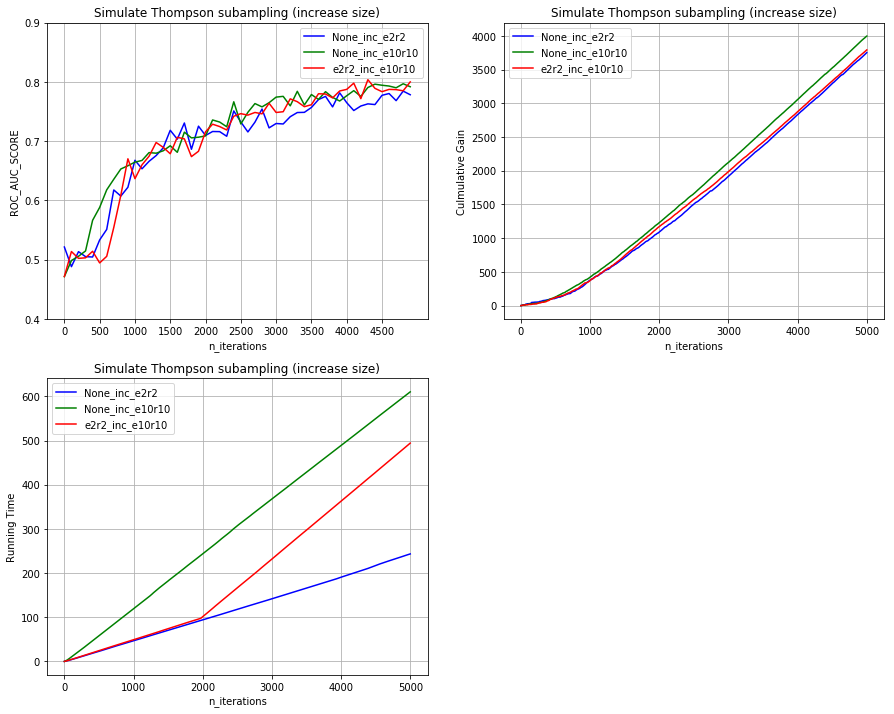

In [19]:
# with open ('outfile_sub50', 'rb') as fp:
#    results = pickle.load(fp)

plt.figure(figsize= (15,12))

color = ['b', 'g', 'r', 'c', 'm', 'y']
    
# rtrs: repeated train ROC-AUC-SCORE
# rtes: repeated test ROC-AUC-SCORE
# rg: repeated cumulative gain

plt.subplot(221)

plt.plot(results['TS_rtrs_e2_r2'][::100], label = 'None_inc_e2r2', color = color[0])
plt.plot(results['TS_rtrs_e10_r10'][::100], label = 'None_inc_e10r10', color = color[1])
plt.plot(results_inc['TS_rtrs_e2_r2'][::100], label = 'e2r2_inc_e10r10', color = color[2])

plt.ylabel('ROC_AUC_SCORE')
plt.xlabel('n_iterations')
plt.xticks(numpy.arange(50, step = 5), numpy.arange(5000)[::500])
plt.ylim(0.4,0.9)
plt.title('Simulate Thompson subampling (increase size)')
plt.grid(True)
plt.legend()

plt.subplot(222)

plt.plot(numpy.cumsum(results['TS_rg_e2_r2']), label = 'None_inc_e2r2', color = color[0])
plt.plot(numpy.cumsum(results['TS_rg_e10_r10']), label = 'None_inc_e10r10', color = color[1])
plt.plot(numpy.cumsum(results_inc['TS_rg_e2_r2']), label = 'e2r2_inc_e10r10', color = color[2])

plt.ylabel('Culmulative Gain')
plt.xlabel('n_iterations')
#plt.ylim(0,1300)
plt.title('Simulate Thompson subampling (increase size)')
plt.grid(True)
plt.legend()

plt.subplot(223)

plt.plot(numpy.cumsum(results['time_e2_r2']), label = 'None_inc_e2r2', color = color[0])
plt.plot(numpy.cumsum(results['time_e10_r10']), label = 'None_inc_e10r10', color = color[1])
plt.plot(numpy.cumsum(results_inc['time_e2_r2']), label = 'e2r2_inc_e10r10', color = color[2])

plt.ylabel('Running Time')
plt.xlabel('n_iterations')
#plt.ylim(0,1300)
plt.title('Simulate Thompson subampling (increase size)')
plt.grid(True)
plt.legend()


### plot gain vs running time

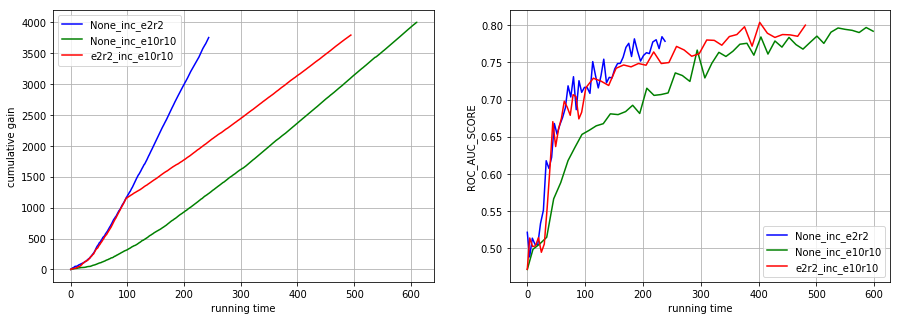

In [24]:
plt.figure(figsize= (15,5))


# rtrs: repeated train ROC-AUC-SCORE
# rtes: repeated test ROC-AUC-SCORE
# rg: repeated cumulative gain

plt.subplot(121)

plt.plot(numpy.cumsum(results['time_e2_r2']), 
         numpy.cumsum(results['TS_rg_e2_r2']), label='None_inc_e2r2', color = color[0])
plt.plot(numpy.cumsum(results['time_e10_r10']), 
         numpy.cumsum(results['TS_rg_e10_r10']), label='None_inc_e10r10', color = color[1])
plt.plot(numpy.cumsum(results_inc['time_e2_r2']), 
         numpy.cumsum(results_inc['TS_rg_e2_r2']), label='e2r2_inc_e10r10', color = color[2])
    
plt.xlabel("running time")
plt.ylabel("cumulative gain")
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.plot(numpy.cumsum(results['time_e2_r2'])[::100], 
         results['TS_rtrs_e2_r2'][::100], label='None_inc_e2r2', color = color[0])
plt.plot(numpy.cumsum(results['time_e10_r10'])[::100], 
         results['TS_rtrs_e10_r10'][::100], label='None_inc_e10r10', color = color[1])
plt.plot(numpy.cumsum(results_inc['time_e2_r2'])[::100], 
         results_inc['TS_rtrs_e2_r2'][::100], label='e2r2_inc_e10r10', color = color[2])
plt.xlabel("running time")
plt.ylabel("ROC_AUC_SCORE")
plt.legend()
plt.grid(True)
